In [1]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from keras import datasets, utils
from PIL import Image
from matplotlib import pyplot as plt

2023-12-05 08:21:32.571985: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 08:21:32.573901: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 08:21:32.617898: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-05 08:21:32.621104: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-05 08:21:33.342075: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Importing sample image data from datasets
(X_train, Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 166s 1us/step


In [3]:
#Single Image from the Training Dataset
image1 = Image.fromarray(X_train[25],"RGB")
image1.show()

Error: no "view" mailcap rules found for type "image/png"
Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
Can't call method "get_value" on an undefined value at /usr/bin/mimeopen line 159.
Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "/tmp/tmpl7cqv4gz.PNG"
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


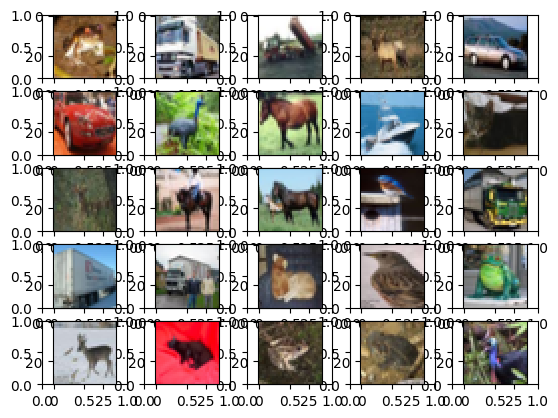

In [4]:
## Show 25 images in a panel
ncols, nrows = 5,5
figs,ax = plt.subplots(nrows,ncols)
for j in range(ncols*nrows):
    figs.add_subplot(nrows,ncols,j+1)
    plt.imshow(Image.fromarray(X_train[j],"RGB"))
    j = j + 1
plt.show()

In [5]:
## Indicates categories of Pictures
NUM_CLASSES = 10

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Y_train = utils.to_categorical(Y_train,NUM_CLASSES)
Y_test = utils.to_categorical(Y_test,NUM_CLASSES)

In [7]:
## building multi layer perceptron model
input_layer = layers.Input(shape=(32,32,3))
x = layers.Flatten()(input_layer)
x = layers.Dense(units=200,activation='relu')(x)
x = layers.Dense(units=150,activation='relu')(x)
output_layer = layers.Dense(units=10,activation='softmax')(x)
model = models.Model(input_layer,output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
## Use Tensorboard to show the model graphically

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [11]:
model.fit(X_train,Y_train,batch_size=32,epochs=10,shuffle=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8396 - accuracy: 0.3368
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6555 - accuracy: 0.4093
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5820 - accuracy: 0.4376
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5303 - accuracy: 0.4569
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4954 - accuracy: 0.4666
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4631 - accuracy: 0.4791
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4361 - accuracy: 0.4886
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4152 - accuracy: 0.4959
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3925 - accuracy: 0.5042
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - lo

In [12]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4470 - accuracy: 0.4864


[1.447007179260254, 0.4864000082015991]